# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Цель работы:** 
выбрать лучшую локацию для новой скважины.

**Ход работы:**

1. Загрузка и подготовка данных;
2. Обучение и проверка модели;
3. Подготовка к расчёту прибыли;
4. Расчёт прибыли и рисков.

## Загрузка и подготовка данных

Импортируем необходимые в работе библиотеки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Откроем и изучим предоставленные файлы с данными геологоразведки 3 регионов, получим информацию о данных и их описательные характеристики.

In [2]:
#чтение и изучение данных о регионе 0
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [3]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [5]:
#чтение и изучение данных о регионе 1
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [8]:
#чтение и изучение данных о регионе 2
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [9]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Данные о всех 3 регионах имеють одинаковую структуру:
* `id` - уникальный идентификатор скважины;
* `f0`, `f1`, `f2` - три признака точек (неважно, что они означают, но сами признаки значимы);
* `product` - объём запасов в скважине (тыс. баррелей).

Все таблицы не имеют пропусков и имеют правильно указанные типы данных. Проверим на наличие дубликатов.

In [11]:
#считаем количество дубликатов в таблицах
print('geo_data_0:', geo_data_0.duplicated().sum(), 
      'geo_data_1:', geo_data_1.duplicated().sum(),
      'geo_data_2:', geo_data_2.duplicated().sum())

geo_data_0: 0 geo_data_1: 0 geo_data_2: 0


Дубликаты в таблице не обнаружены. Разделим данные на признаки и целевой признак, неинформативный признак `id` не включим ни в одну из категорий. Масштаб у признаков примерно одинаковый, потому стандартизация данных не потребуется.

In [12]:
#отделяем признаки
features_0 = geo_data_0.drop(['id', 'product'], axis=1)
features_1 = geo_data_1.drop(['id', 'product'], axis=1)
features_2 = geo_data_2.drop(['id', 'product'], axis=1)

#отделяем целевой признак
target_0 = geo_data_0['product']
target_1 = geo_data_1['product']
target_2 = geo_data_2['product']

Построим для всех регионов матрицу диаграмм рассеяния и тепловую карту коэффициентов корреляции Пирсона.

* **Регион 0**

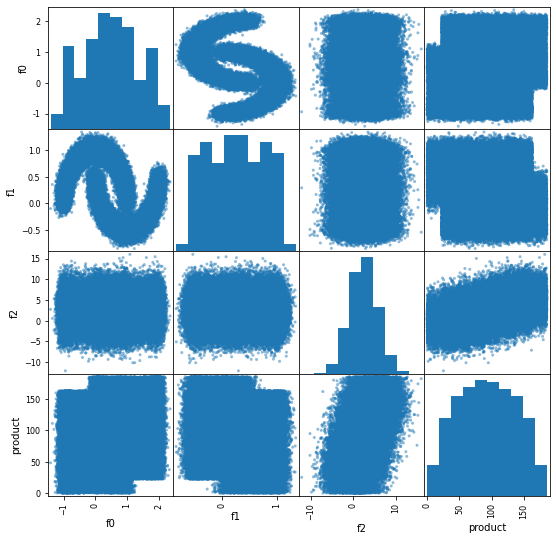

In [13]:
#матрица диаграмм рассеяния
pd.plotting.scatter_matrix(geo_data_0, figsize=(9, 9));

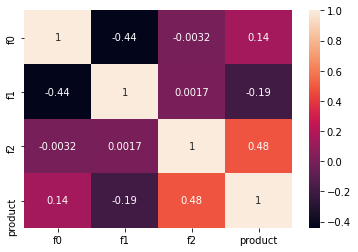

In [14]:
#тепловая карта коэффициентов корреляции Пирсона
sns.heatmap(geo_data_0.corr(), annot=True);

* **Регион 1**

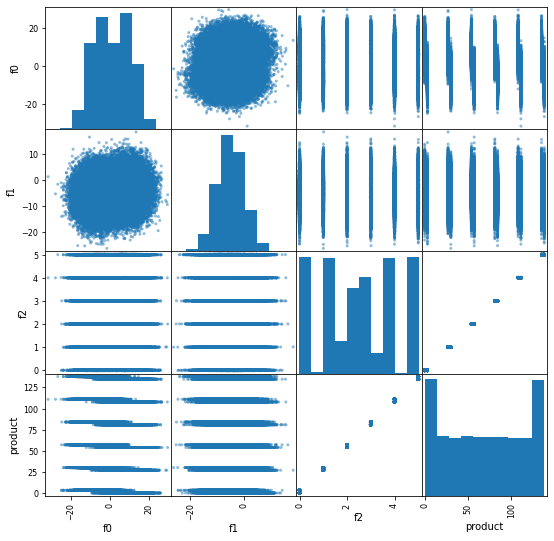

In [15]:
#матрица диаграмм рассеяния
pd.plotting.scatter_matrix(geo_data_1, figsize=(9, 9));

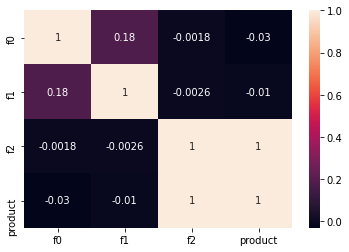

In [16]:
#тепловая карта коэффициентов корреляции Пирсона
sns.heatmap(geo_data_1.corr(), annot=True);

* **Регион 2**

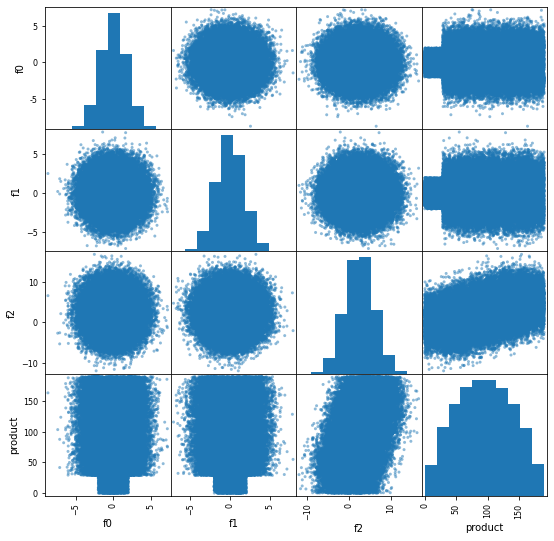

In [17]:
#матрица диаграмм рассеяния
pd.plotting.scatter_matrix(geo_data_2, figsize=(9, 9));

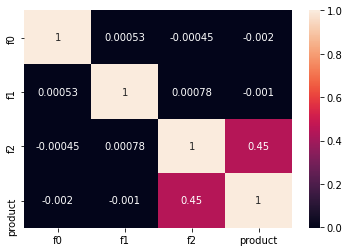

In [18]:
#тепловая карта коэффициентов корреляции Пирсона
sns.heatmap(geo_data_2.corr(), annot=True);

Можно заметить, что признак `f2` довольно сильно коррелирует с целевым признаком `product`, особенно в регионе 1.

Посмотрим распределение целевых признаков на гистограмме.

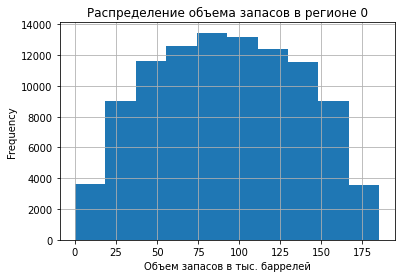

In [19]:
#гистограмма для целевого признака региона 0
ax = target_0.plot(kind='hist',
                   title='Распределение объема запасов в регионе 0',
                   grid=True)
ax.set(xlabel='Объем запасов в тыс. баррелей');

In [20]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


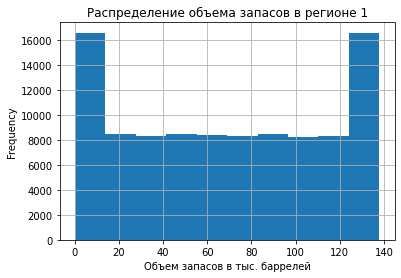

In [21]:
#гистограмма для целевого признака региона 1
ax = target_1.plot(kind='hist',
                   title='Распределение объема запасов в регионе 1',
                   grid=True)
ax.set(xlabel='Объем запасов в тыс. баррелей');

Распределение для региона 1 отличется от нормального, посмотрим, сколько всего есть уникальных значений целевого признака.

In [22]:
len(target_1.unique())

12

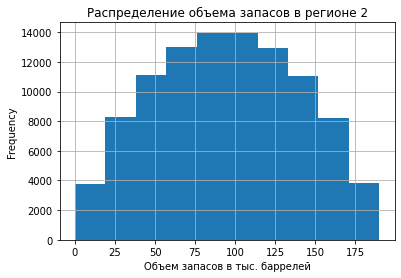

In [23]:
#гистограмма для целевого признака региона 2
ax = target_2.plot(kind='hist',
                   title='Распределение объема запасов в регионе 2',
                   grid=True)
ax.set(xlabel='Объем запасов в тыс. баррелей');

В регионах 0 и 2 объемы запасов распределены нормально, а в регионе 1 распределение отличается от нормального. Адекватность распределений признаков f0, f1 и f2 будет сложно оценить, так как мы не знаем, что они означают, потому не будем смотреть на их распределения.

### Вывод

* Предоставленные данные были загружены и изучены, пропуски или дубликаты не были обнаружены, все типы данных указаны верно. 
* Данные были разбиты на признаки и целевой признак. 
* Были построены матрицы диаграмм рассеяния и тепловые карты коэффициентов корреляции Пирсона, было обнаружено, что признак f2 довольно сильно коррелирует с целевым признаком product, особенно для региона 1.
* Было изучено распределение целевых признаков, для регионов 0 и 2 оно похоже на нормальное, а для региона 1 отличается от нормального, но и уникальных значений целевого признака региона 1 всего 12.

## Обучение и проверка модели

Разделим данные на обучающую и валидационную выборки в отношении 75:25.

In [24]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_0, 
                                                                                      target_0, 
                                                                                      test_size=0.25, 
                                                                                      random_state=12345)

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, 
                                                                                      target_1, 
                                                                                      test_size=0.25, 
                                                                                      random_state=12345)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, 
                                                                                      target_2, 
                                                                                      test_size=0.25, 
                                                                                      random_state=12345)

#проверка размеров выборок
print('Регион 0:', features_train_0.shape, target_train_0.shape, 
      features_valid_0.shape, target_valid_0.shape, '\n',
      'Регион 1:',features_train_1.shape, target_train_1.shape, 
      features_valid_1.shape, target_valid_1.shape, '\n',
      'Регион 2:',features_train_2.shape, target_train_2.shape, 
      features_valid_2.shape, target_valid_2.shape)

Регион 0: (75000, 3) (75000,) (25000, 3) (25000,) 
 Регион 1: (75000, 3) (75000,) (25000, 3) (25000,) 
 Регион 2: (75000, 3) (75000,) (25000, 3) (25000,)


Обучим модель при помощи линейной регрессии, сделаем предсказания на валидационной выборке и оценим средний запас предсказанного сырья и RMSE.

In [25]:
#обучение модели для региона 0
model = LinearRegression()
model.fit(features_train_0, target_train_0)
predictions_valid_0 = model.predict(features_valid_0)
print('Cредний запас предсказанного сырья:', round(predictions_valid_0.mean(), 2),
      'RMSE:', round(mean_squared_error(target_valid_0, predictions_valid_0)**0.5, 2))

Cредний запас предсказанного сырья: 92.59 RMSE: 37.58


In [26]:
#обучение модели для региона 1
model = LinearRegression()
model.fit(features_train_1, target_train_1)
predictions_valid_1 = model.predict(features_valid_1)
print('Cредний запас предсказанного сырья:', round(predictions_valid_1.mean(), 2),
      'RMSE:', round(mean_squared_error(target_valid_1, predictions_valid_1)**0.5, 2))

Cредний запас предсказанного сырья: 68.73 RMSE: 0.89


In [27]:
#обучение модели для региона 2
model = LinearRegression()
model.fit(features_train_2, target_train_2)
predictions_valid_2 = model.predict(features_valid_2)
print('Cредний запас предсказанного сырья:', round(predictions_valid_2.mean(), 2),
      'RMSE:', round(mean_squared_error(target_valid_2, predictions_valid_2)**0.5, 2))

Cредний запас предсказанного сырья: 94.97 RMSE: 40.03


### Вывод

Для регионов 0 и 2 средний запас предсказанного сырья самый высокий, но при этом и показатель RMSE достаточно высокий, что говорит о неточности модели, а для региона 1 средний предсказанный запас меньше, но при этом модель работает точнее и показатель RMSE самый маленький из всех, однако стоит помнить о маленьком количестве уникальных значений целевого признака, следовательно, работе модели для региона 1 тоже не стоит полностью доверять.

## Подготовка к расчёту прибыли

Сохраним все ключевые значения для расчетов из условия задачи.

In [28]:
#При разведке региона исследуют 500 точек, 
#из которых с помощью машинного обучения выбирают 200 лучших для разработки
WELLS = 500
WELLS_TOP = 200

#Бюджет на разработку скважин в регионе — 10 млрд рублей
BUDGET = 10 * 10**9

#Доход с каждой единицы продукта составляет 450 тыс. рублей
UNIT_INCOME = 450 * 10**3

#количество выборок для бутстрепа
BOOTSTRAP_SAMPLES = 1000

Рассчитаем достаточный объем сырья для безубыточной разработки новой скважины.

In [29]:
print('Достаточный объем сырья для безубыточной разработки новой скважины', 
      round(BUDGET/(UNIT_INCOME * WELLS_TOP), 2))

Достаточный объем сырья для безубыточной разработки новой скважины 111.11


### Вывод

На данном этапе были сохранены все ключевые значения для расчетов и посчитан достаточный объем сырья для безубыточной разработки новой скважины: 111.11. Данное значение превышает средний предсказанный объем сырья для каждого из регионов.

## Расчёт прибыли и рисков 

Напишем функцию для расчета прибыли по выбранным скважинам и предсказаниям модели.

In [30]:
#приводим целевые признаки и предсказания к Series, приводим к одинаковым индексам
target_valid_0 = target_valid_0.reset_index(drop=True)
target_valid_1 = target_valid_1.reset_index(drop=True)
target_valid_2 = target_valid_2.reset_index(drop=True)

predictions_valid_0 = pd.Series(predictions_valid_0).reset_index(drop=True)
predictions_valid_1 = pd.Series(predictions_valid_1).reset_index(drop=True)
predictions_valid_2 = pd.Series(predictions_valid_2).reset_index(drop=True)

In [31]:
state = np.random.RandomState(12345)

#функция для расчета прибыли
def revenue_count(target, predictions):
    #выбираем случайным образом 500 скважин из предсказаний
    predictions_subsample = predictions.sample(n=WELLS, random_state=state)
    
    #из них выбираем 200 лучших 
    predictions_top = predictions_subsample.sort_values(ascending=False)[:WELLS_TOP]
    
    #берем целевые значения с теми же индексами, что и 200 лучших точек
    target_top = target[predictions_top.index]
    
    #суммируем целевые значения объема
    target_sum = target_top.sum()
    
    #считаем и возвращаем прибыль
    return target_sum * UNIT_INCOME - BUDGET

Напишем функцию, которая с помощью бутстрепа найдет распределение прибыли и вернет среднюю прибыль, 95%-й доверительный интервал и риск убытков для региона.

In [32]:
#функция для расчета средней прибыли, риска убытка и доверительного интервала с помощью бутстрепа
def revenue_risk_count(target, predictions):
    #счетчик убытков
    risk = 0
    #массив для прибыли
    res = []
    #считаем прибыль 1000 раз
    for _ in range(BOOTSTRAP_SAMPLES):
        revenue = revenue_count(target, predictions)
        res.append(revenue)
        #если убыток, то прибавляем в переменную risk
        if revenue < 0:
            risk += 1
            
    res = pd.Series(res)
    
    #считаем среднюю прибыль
    revenue_mean = res.mean()
    
    #находим доверительный интервал
    lower = res.quantile(0.025)
    upper = res.quantile(0.975)
    
    #считаем риск убытков
    risk = risk / BOOTSTRAP_SAMPLES
    
    return revenue_mean, lower, upper, risk

In [33]:
#функция для вывода результата
def print_result(region, revenue_mean, lower, upper, risk):
    print('Регион {:.0f}:'.format(region), '\n', 
          'Средняя прибыль:', round(revenue_mean/10**6, 2), 'млн. \n', 
          '95%-й доверительный интервал:', round(lower/10**6, 2), 
          '—', round(upper/10**6, 2), 'млн. \n', 
          'Риск убытков:', round(risk*100, 2), '%')

In [34]:
#регион 0
revenue_mean, lower, upper, risk = revenue_risk_count(target_valid_0, predictions_valid_0)
print_result(0, revenue_mean, lower, upper, risk)

Регион 0: 
 Средняя прибыль: 380.71 млн. 
 95%-й доверительный интервал: -126.95 — 879.61 млн. 
 Риск убытков: 7.2 %


In [35]:
#регион 1
revenue_mean, lower, upper, risk = revenue_risk_count(target_valid_1, predictions_valid_1)
print_result(1, revenue_mean, lower, upper, risk)

Регион 1: 
 Средняя прибыль: 454.79 млн. 
 95%-й доверительный интервал: 46.73 — 840.21 млн. 
 Риск убытков: 1.3 %


In [36]:
#регион 2
revenue_mean, lower, upper, risk = revenue_risk_count(target_valid_2, predictions_valid_2)
print_result(2, revenue_mean, lower, upper, risk)

Регион 2: 
 Средняя прибыль: 389.22 млн. 
 95%-й доверительный интервал: -115.61 — 906.51 млн. 
 Риск убытков: 7.3 %


### Вывод

Самая большая средняя прибыль у региона 1, у него также и самый небольшой риск убытков и подходящий под условия задачи (менее 2.5%). Для регионов 0 и 2 значения средней прибыли немного меньше, но у них довольно большой риск убытков. Если не брать во внимание проблемы с распределением целевого признака, то в качестве локации для новой скважины нужно выбрать регион 1.

## Общий вывод

В ходе данной работы изучены и подготовлены предоставленные данные, для каждого региона обучены и проверены модели с помощью линейной регрессии, самый небольшой показатель RMSE у региона 1. Также с помощью бутстрепа было найдено распределение прибыли, средняя прибыль, 95%-й доверительный интервал и риск убытков, самая большая средняя прибыль и самый небольшой риск убытков также у региона 1. В качестве локации для новой скважины стоит выбрать регион 1.